In [5]:
pip install geopandas shapely matplotlib

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [7]:
import pandas as pd

In [8]:
from google.colab import files
uploaded = files.upload()


Saving india.geojson to india.geojson


In [9]:
states = gpd.read_file("/content/india.geojson")

In [10]:
print(states.head())

     id   district dt_code    st_nm st_code    year  \
0  None     Aizawl     261  Mizoram      15  2011_c   
1  None   Champhai     262  Mizoram      15  2011_c   
2  None    Kolasib     263  Mizoram      15  2011_c   
3  None  Lawngtlai     264  Mizoram      15  2011_c   
4  None    Lunglei     265  Mizoram      15  2011_c   

                                            geometry  
0  POLYGON ((93.04466 23.41052, 92.9468 23.51363,...  
1  MULTIPOLYGON (((93.04619 23.66623, 93.04466 23...  
2  POLYGON ((92.89633 24.39072, 92.86116 24.31374...  
3  POLYGON ((92.93456 22.55405, 92.9315 22.39458,...  
4  POLYGON ((92.67307 23.38303, 92.68989 23.32804...  


In [11]:
print(states.crs)

EPSG:4326


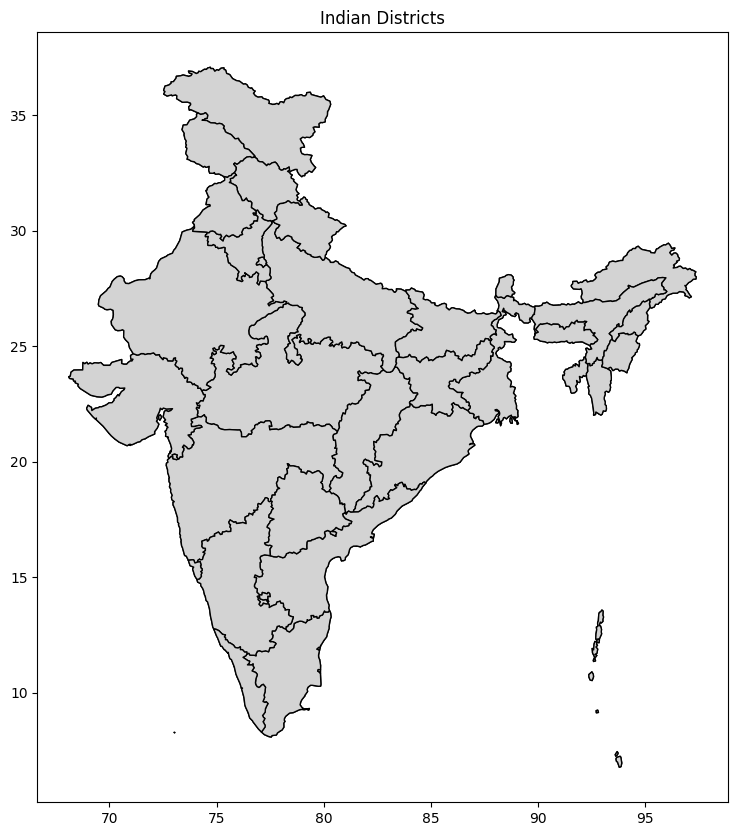

In [12]:
states.plot(figsize=(10,10), edgecolor='black', color = 'lightgrey')
plt.title("Indian Districts")
plt.show()

In [13]:
from shapely.geometry import Polygon

In [15]:
delhi = states[states["st_nm"] == "Delhi"]
delhi.geometry.iloc[0].exterior.coords[:5]

[(77.22827419863589, 28.769317205814918),
 (77.29861683709427, 28.70882801254268),
 (77.31696709060516, 28.641465047307687),
 (77.34143409528635, 28.609845696279017),
 (77.2970876493017, 28.567228310109936)]

In [16]:
sat_1 = Polygon([(77.22827419863589, 28.769317205814918),
 (77.29861683709427, 28.70882801254268),
 (77.31696709060516, 28.641465047307687),
 (77.34143409528635, 28.609845696279017),
 (77.2970876493017, 28.567228310109936)
 ])

In [17]:
satellites = gpd.GeoDataFrame(
    {"sat_id": ["SAT-1"]},
    geometry = [sat_1],
    crs="EPSG:4326"
)

In [18]:
print(satellites)

  sat_id                                           geometry
0  SAT-1  POLYGON ((77.22827 28.76932, 77.29862 28.70883...


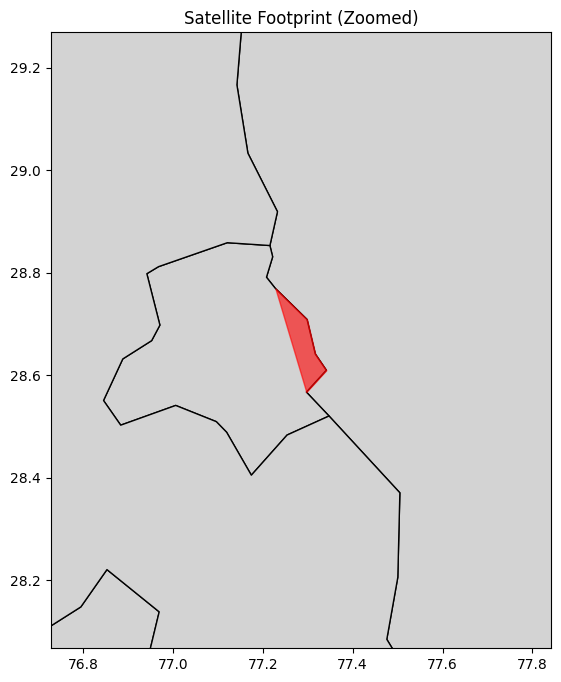

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))

states.plot(ax=ax, color="lightgrey", edgecolor="black")
satellites.plot(ax=ax, color="red", alpha=0.6, edgecolor="red")

# Zoom to satellite bounds
minx, miny, maxx, maxy = satellites.total_bounds
ax.set_xlim(minx - 0.5, maxx + 0.5)
ax.set_ylim(miny - 0.5, maxy + 0.5)

plt.title("Satellite Footprint (Zoomed)")
plt.show()

In [22]:
print(states.crs)

EPSG:4326


In [23]:
print(satellites.crs)

EPSG:4326


In [24]:
print(satellites.total_bounds)

[77.2282742  28.56722831 77.3414341  28.76931721]


In [42]:
from shapely.geometry import box
mumbai = states[
    (states["st_nm"]== "Maharashtra") & (states["district"].str.contains("Mumbai", case = False))
]
minx, miny, maxx, maxy = mumbai.total_bounds
sat_2 = box(minx, miny, maxx, maxy)

In [33]:
kolkata = states[(states["st_nm"]=="West Bengal")& (states["district"].str.contains("Kolkata", case = False))]
minx, miny, maxx, maxy = kolkata.total_bounds
sat_3 = box(minx, miny, maxx, maxy)

In [48]:
satellites = gpd.GeoDataFrame(
    {"sat_id":["sat_Delhi", "sat_Mumbai", "sat_Kolkata"],
    "geometry":[sat_1,sat_2,sat_3]},
    crs=states.crs
)

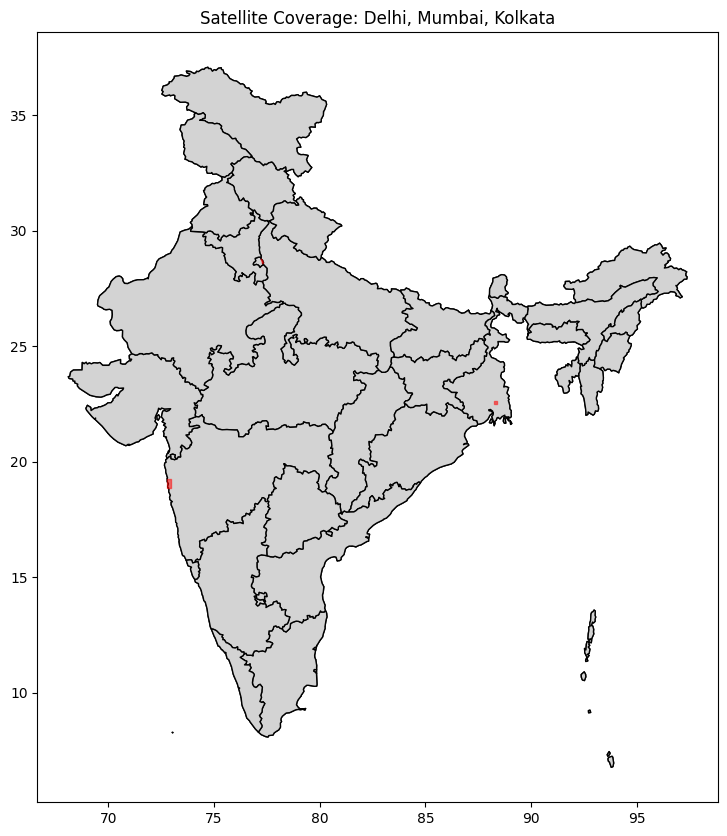

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

states.plot(ax=ax, color="lightgrey", edgecolor="black")
satellites.plot(ax=ax, color="red", alpha=0.5, edgecolor="red")

plt.title("Satellite Coverage: Delhi, Mumbai, Kolkata")
plt.show()

#Visualization of Coverage

Satellite footprints visualized on India map.

Red polygons = satellite swaths.

Helps quickly identify gaps in coverage and optimize satellite positioning.

In [41]:
states[states["st_nm"] == "Maharashtra"]["district"].unique()

array(['Gondia', 'Bhandara', 'Jalgaon', 'Wardha', 'Buldhana', 'Akola',
       'Nashik', 'Gadchiroli', 'Washim', 'Chandrapur', 'Yavatmal',
       'Jalna', 'Ahmednagar', 'Hingoli', 'Nanded', 'Parbhani', 'Pune',
       'Beed', 'Mumbai', 'Latur', 'Osmanabad', 'Solapur', 'Satara',
       'Ratnagiri', 'Sangli', 'Kolhapur', 'Sindhudurg', 'Thane',
       'Palghar', 'Nandurbar', 'Amravati', 'Dhule', 'Nagpur',
       'Aurangabad', 'Raigad', None], dtype=object)

In [37]:
states.shape

(759, 7)

In [50]:
coverage = gpd.sjoin(states, satellites, how="inner", predicate="intersects")


#District-level Spatial Mapping

Spatial join allowed you to map districts to satellites.

sat_Delhi  → Delhi, South Delhi, North Delhi, ...
sat_Mumbai → Mumbai City, Mumbai Suburban, ...
sat_Kolkata → Kolkata, Howrah, ...


This demonstrates exact coverage per administrative region, which is critical for planning satellite passes and observations.

In [52]:
print(coverage[["district","st_nm","sat_id"]].head(10))

                district          st_nm       sat_id
86                Mumbai    Maharashtra   sat_Mumbai
154                Thane    Maharashtra   sat_Mumbai
185    South 24 Parganas    West Bengal  sat_Kolkata
251               Raigad    Maharashtra   sat_Mumbai
375                Delhi          Delhi    sat_Delhi
380  Gautam Buddha Nagar  Uttar Pradesh    sat_Delhi
555    North 24 Parganas    West Bengal  sat_Kolkata
569               Howrah    West Bengal  sat_Kolkata
571              Kolkata    West Bengal  sat_Kolkata
596            Ghaziabad  Uttar Pradesh    sat_Delhi


In [53]:
coverage["sat_id"].value_counts()

,count
sat_id,
sat_Kolkata,5
sat_Delhi,5
sat_Mumbai,4



#Satellite Coverage Overview

Each satellite footprint covers multiple districts.

sat_Delhi → covers 5 districts

sat_Kolkata → covers 5 districts

sat_Mumbai → covers 4 districts

This shows how satellite positioning affects ground coverage.

In [56]:
satellite_districts = coverage.groupby("sat_id")[["district","st_nm"]].apply(lambda x: x.values.tolist())

In [57]:
print(satellite_districts)

sat_id
sat_Delhi      [[Delhi, Delhi], [Gautam Buddha Nagar, Uttar P...
sat_Kolkata    [[South 24 Parganas, West Bengal], [North 24 P...
sat_Mumbai     [[Mumbai, Maharashtra], [Thane, Maharashtra], ...
dtype: object


In [58]:
satellite_districts = satellite_districts.reset_index()

In [59]:
print(satellite_districts)

        sat_id                                                  0
0    sat_Delhi  [[Delhi, Delhi], [Gautam Buddha Nagar, Uttar P...
1  sat_Kolkata  [[South 24 Parganas, West Bengal], [North 24 P...
2   sat_Mumbai  [[Mumbai, Maharashtra], [Thane, Maharashtra], ...


In [62]:
satellite_districts.columns = ["sat_id", "Districts_covered"]
satellite_districts

,sat_id,Districts_covered
0,sat_Delhi,"[[Delhi, Delhi], [Gautam Buddha Nagar, Uttar P..."
1,sat_Kolkata,"[[South 24 Parganas, West Bengal], [North 24 P..."
2,sat_Mumbai,"[[Mumbai, Maharashtra], [Thane, Maharashtra], ..."


In [63]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=satellite_districts)

https://docs.google.com/spreadsheets/d/1IrYb1eY1Nec87DJAisUb7osc9P1JtuYWxqTFveVCqUc/edit#gid=0


#Practical Applications / Business Value

Ensures efficient satellite usage for observation or data collection.

Can plan which satellite should capture data for specific regions.

Can identify regions not covered, helping plan future satellite deployment.

Provides decision-making data instead of just maps.

#Geospatial Skills Demonstrated

CRS handling for alignment of multiple datasets.

Creation of satellite footprints using polygons (bounding boxes or buffers).

Spatial join (intersects) to determine coverage.

Aggregation of districts per satellite.

Data visualization using GeoPandas and Matplotlib.